In [1]:
using StateSpaceDynamics

In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.5686413682169027 0.4313586317830972; 0.39042143546215796 0.6095785645378421], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9204668006251124 -0.2350337612917968; 0.2350337612917968 0.9204668006251124], [0.1 0.0; 0.0 0.1], [0.0, 0.0], [0.1 0.0; 0.0 0.1]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.8595553820616212 -1.6658075498442124; -1.4692882055065464 0.38163694535441856; … ; 0.517130881450359 1.1979596698125403; 1.4472238915818758 -1.2290887130815225], [0.5 0.0 … 0.0 0.0; 0.0 0.5 … 0.0 0.0; … ; 0.0 0.0 … 0.5 0.0; 0.0 0.0 … 0.0 0.5]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}

In [3]:
T = 100
# Generate synthetic data
_, y, x = sample(model, T)


([-0.011827244398846836 0.2788244678457647 … -0.5135485402627522 -0.7222594414897753; -0.22639925721218238 -0.6176799382452005 … -0.02911931950838531 -0.5959456259990294], [1.0441932962440357 1.0861809232869089 … -1.300954969059553 1.96928608983541; -0.8758466925784547 -0.26292180897649947 … 0.7554874898897549 1.2577224172402872; … ; -1.3624159771569548 -1.3162247190750846 … 0.1677250883195226 -0.9174156153303139; -1.428861222928581 1.5586739277867219 … -0.37485295387800205 0.09887630441079115], [2, 2, 1, 1, 1, 2, 2, 2, 1, 2  …  2, 2, 2, 2, 1, 2, 2, 2, 2, 2])

In [4]:
using Plots

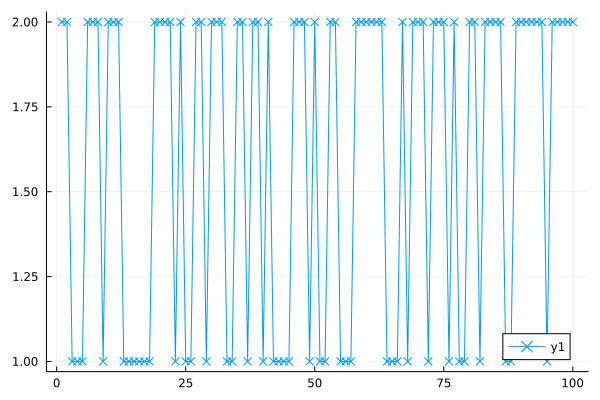

In [5]:
plot(x, marker=:x)

In [6]:
# smooth observations using the naive model
smoothed_x, smoothed_p, _ = smooth(model.B[1], y)

([-0.1826966425695549 0.05623852530878825 … -0.2905685924702149 -0.6344428090759818; -0.2974189111596512 -0.7382982188587216 … 0.2859480284202404 -0.43557054322957933], [0.02584786057682093 -0.000772272269630489; -0.000772272269630489 0.030017582930369182;;; 0.02745175098140197 -0.000998997125736971; -0.000998997125736971 0.03241619970210085;;; 0.027559472122560512 -0.0010341527918415058; -0.0010341527918415058 0.032600185198925595;;; … ;;; 0.027590650713342324 -0.0010377526328384295; -0.0010377526328384295 0.032670693842863086;;; 0.027938884938593714 -0.0010734751986067083; -0.0010734751986067083 0.03331306178667164;;; 0.033832829463928814 -0.001644364618177169; -0.001644364618177169 0.04107628408502342], [0.0 0.0; 0.0 0.0;;; 0.0061552379024149475 -0.0022193224556628396; 0.0014250823445056597 0.008299404458570933;;; 0.006549311332050077 -0.002435622961737791; 0.0014637818406161211 0.008952116432752332;;; … ;;; 0.006584938172269613 -0.0024599810534247217; 0.0014632973953307878 0.009020

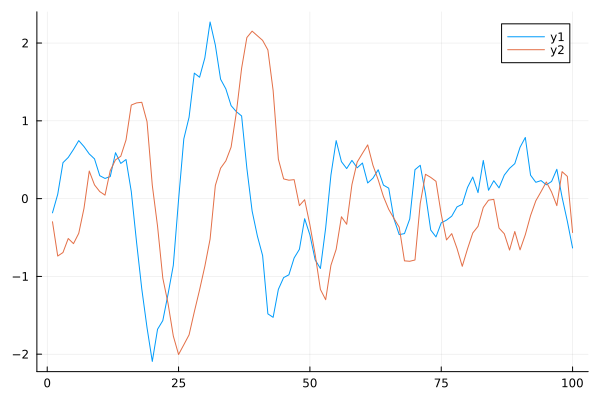

In [7]:
plot(smoothed_x')

In [8]:
w = rand(T);

In [9]:
loglikelihood(smoothed_x, model.B[1], y, w)

-253.717996862333

In [10]:
loglikelihood(smoothed_x, model.B[1], y)

-498.46103307205516

In [11]:
smooth(model.B[1], y, w)

([-0.15650163614031368 0.11270661051298171 … -0.3792068729582794 -0.6475664428947469; -0.41098138813650303 -0.7866460848827623 … 0.1420848984036496 -0.4917625256840466], [0.09286661916492114 -0.002259748695996085; -0.002259748695996085 0.10591566888539601;;; 0.054041129321529636 -0.0017735770021970938; -0.0017735770021970938 0.06357633942911091;;; 0.03653857105074204 -0.0016859837784758045; -0.0016859837784758045 0.044148784727308946;;; … ;;; 0.074782271478958 -0.002626618374803943; -0.002626618374803943 0.08768663117611893;;; 0.07298850015688726 -0.0022339618285208023; -0.0022339618285208023 0.08578213389740191;;; 0.05493559013321437 -0.002940332776890718; -0.002940332776890718 0.06762087629770329], [0.0 0.0; 0.0 0.0;;; 0.019327261642513926 -0.006649184537977794; 0.004650270084064614 0.025395161245323802;;; 0.013893561430192422 -0.005158233898256746; 0.0031515719038051585 0.01911336711323585;;; … ;;; 0.009595533954086613 -0.0037762342389954296; 0.001993196380704522 0.01343064360394610

In [12]:
FB_storage = StateSpaceDynamics.initialize_forward_backward(model, T)

StateSpaceDynamics.ForwardBackward{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; … ;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0;;; 0.0 0.0; 0.0 0.0])

In [13]:
variational_expectation!(model, y, FB_storage)

In [17]:
fit!(model, y; max_iter=3)

(Float64[], Float64[])